## General Libraries

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading our Training Dataset

In [34]:
df = pd.read_csv("/Users/mark/Documents/crab_age_prediction/Crab Age Prediction Model/training_dataset.csv")
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


## Data Exploration and Cleaning

In [35]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Number of duplicate rows: 0
Missing values in each column:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


## Separating numerical and categorical data 

In [36]:
print(df.dtypes)

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object


In [37]:
numerical_df = df.select_dtypes(include=['number'])

categorical_df = df.select_dtypes(include=['object', 'category', 'bool'])

In [38]:
numerical_df.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [39]:
categorical_df.head()

,Sex
0,I
1,I
2,M
3,F
4,I


In [40]:
df = df.drop(columns=['id'])

numerical_df = numerical_df.drop(columns=['id'])

## Exploratory Data Analysis

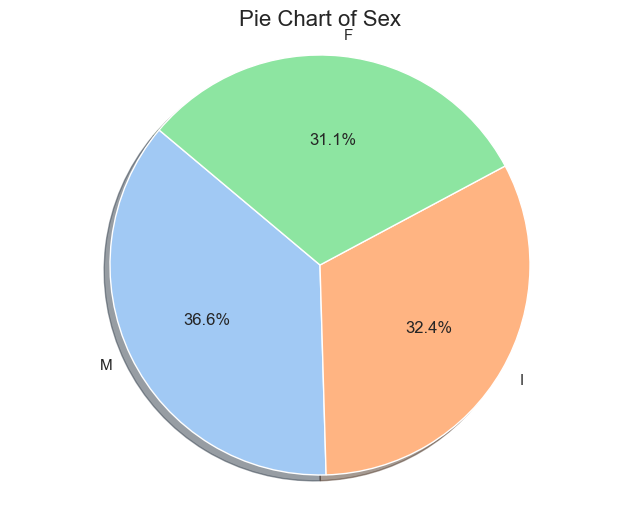

In [41]:
import matplotlib.pyplot as plt

category_column = "Sex"

# Define a custom color palette
colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
df[category_column].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Pie Chart of ' + category_column, fontsize=16)
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

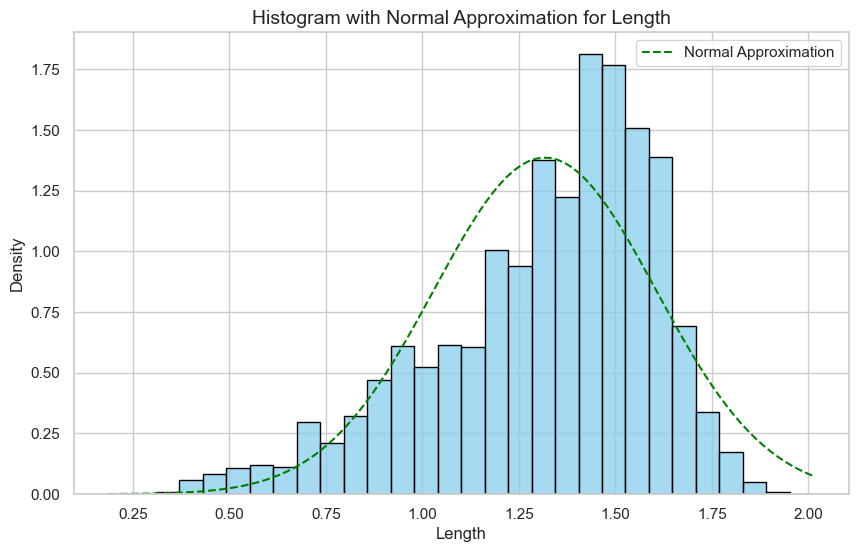

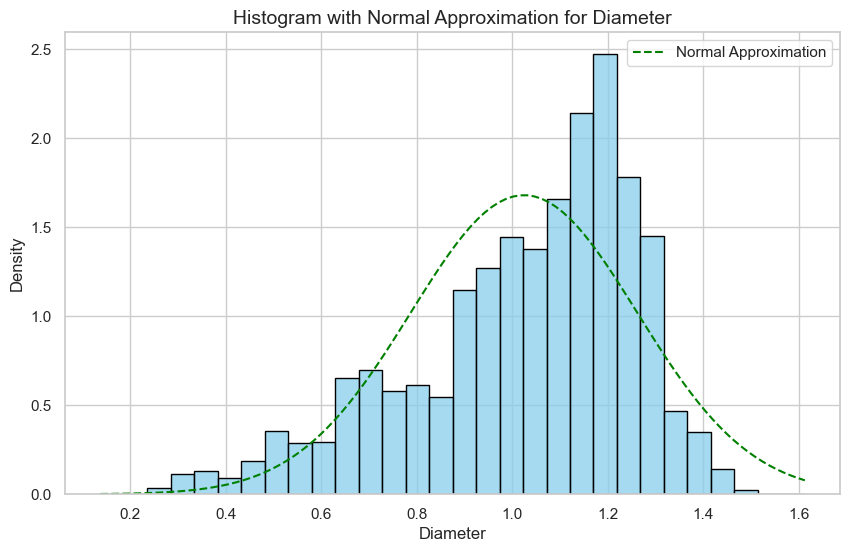

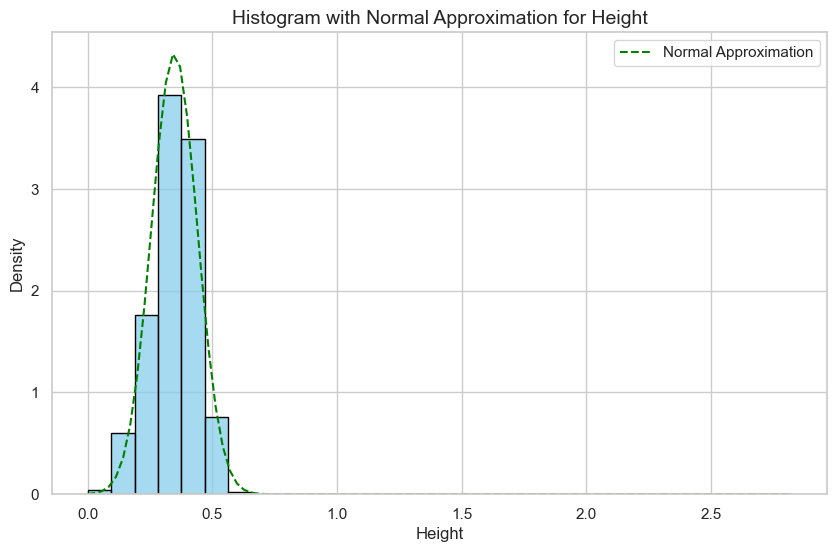

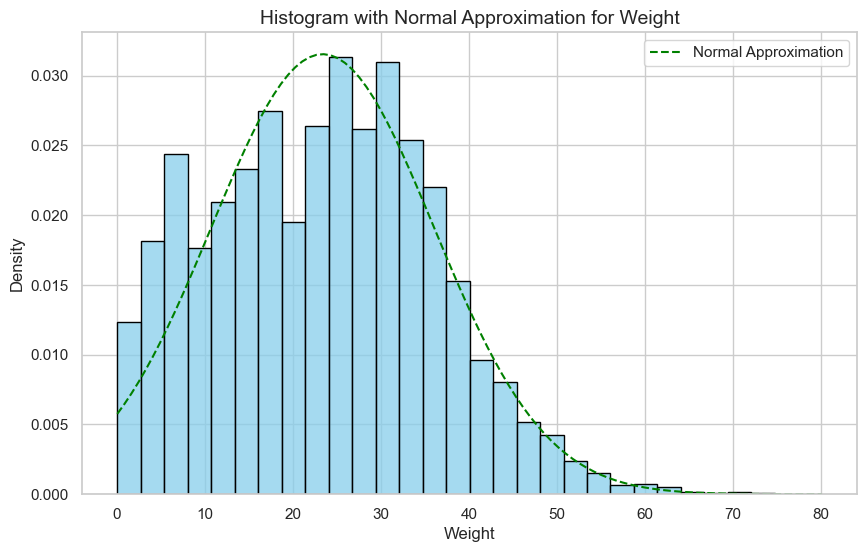

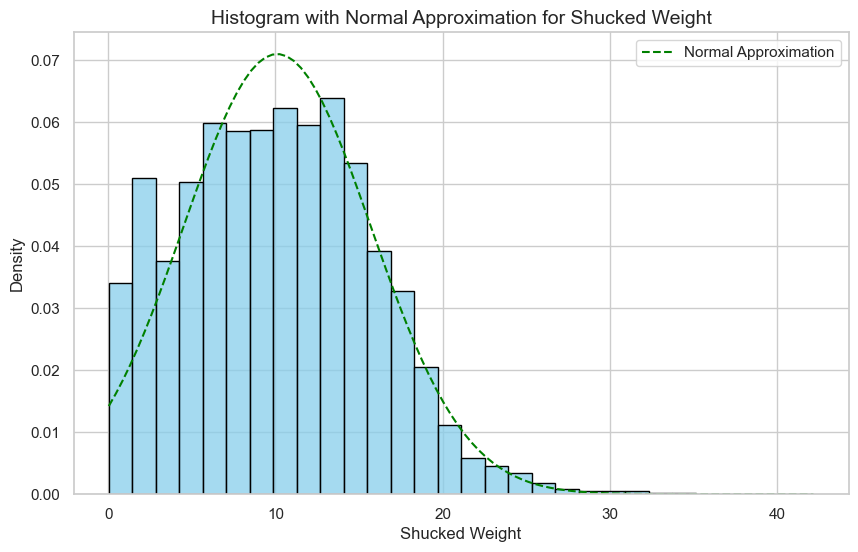

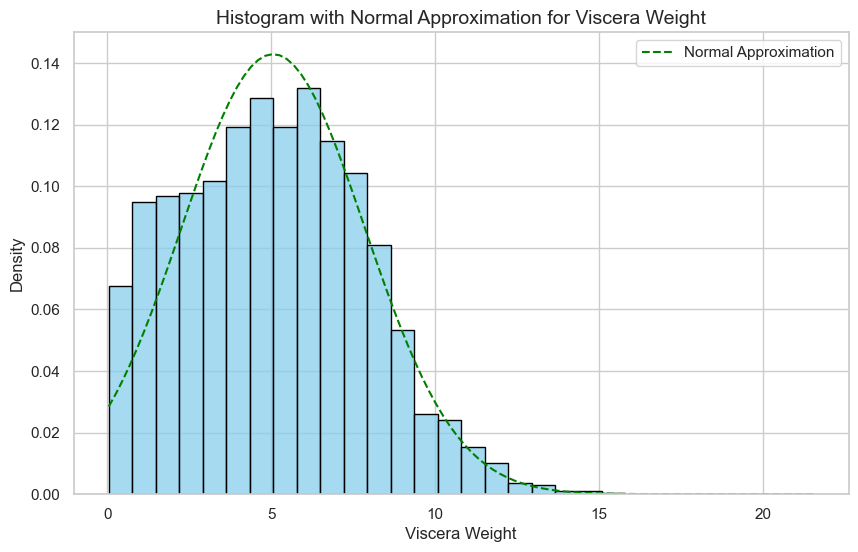

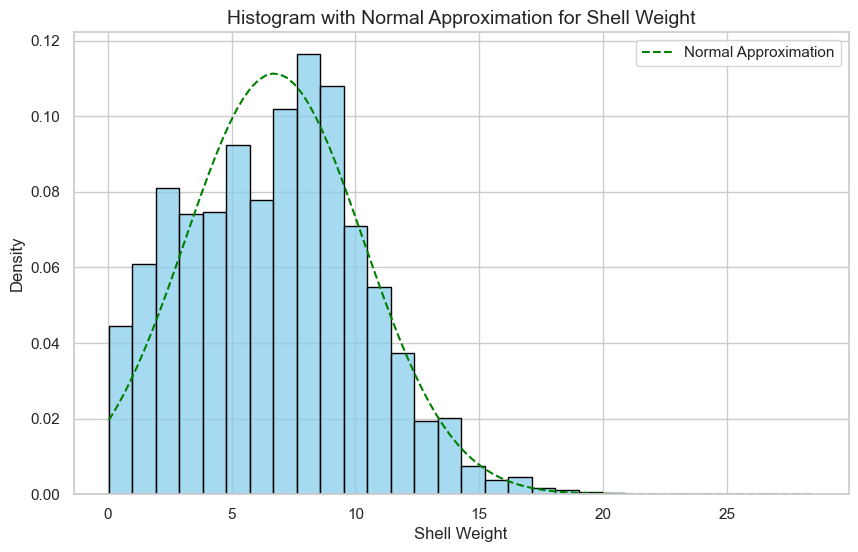

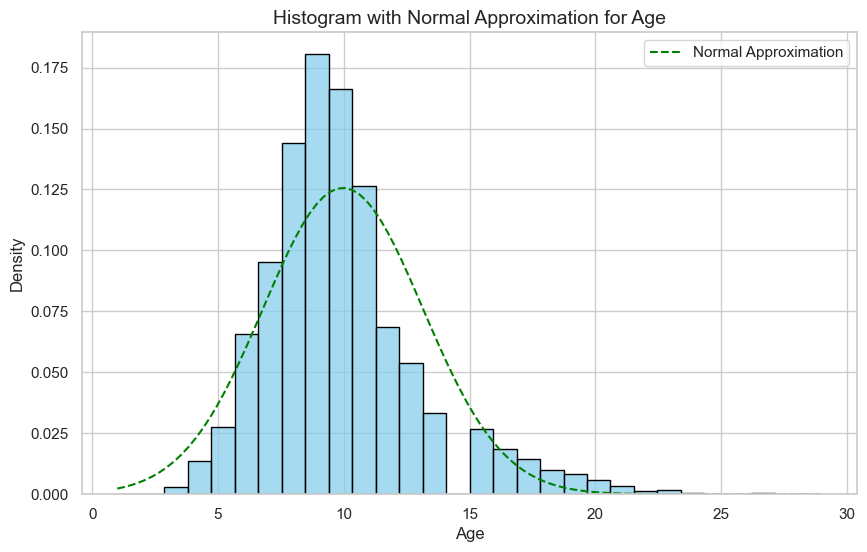

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore', category=FutureWarning, message="use_inf_as_na option is deprecated and will be removed in a future version")

# Set the style for the plots
sns.set(style="whitegrid")

for column in numerical_df.columns:
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram
    sns.histplot(df[column], kde=False, stat='density', color='skyblue', edgecolor='black', bins=30)
    
    # Calculate the normal distribution approximation
    x = numerical_df[column].dropna()
    mean, std = x.mean(), x.std()
    xmin, xmax = x.min(), x.max()
    x_values = np.linspace(xmin, xmax, 100)
    plt.plot(x_values, stats.norm.pdf(x_values, mean, std), color='green', linestyle='--', label='Normal Approximation')
    
    # Add titles and labels
    plt.title(f'Histogram with Normal Approximation for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.show()

In [43]:
numerical_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


## Encoding of categorical variable and checking for multicollinearity

In [44]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

sex_encoded = encoder.fit_transform(df[['Sex']])

sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))

df_one_hot = pd.concat([df.drop('Sex', axis=1), sex_encoded_df], axis=1)

df_one_hot.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1.0,0.0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1.0,0.0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.0,1.0
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,0.0,0.0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1.0,0.0


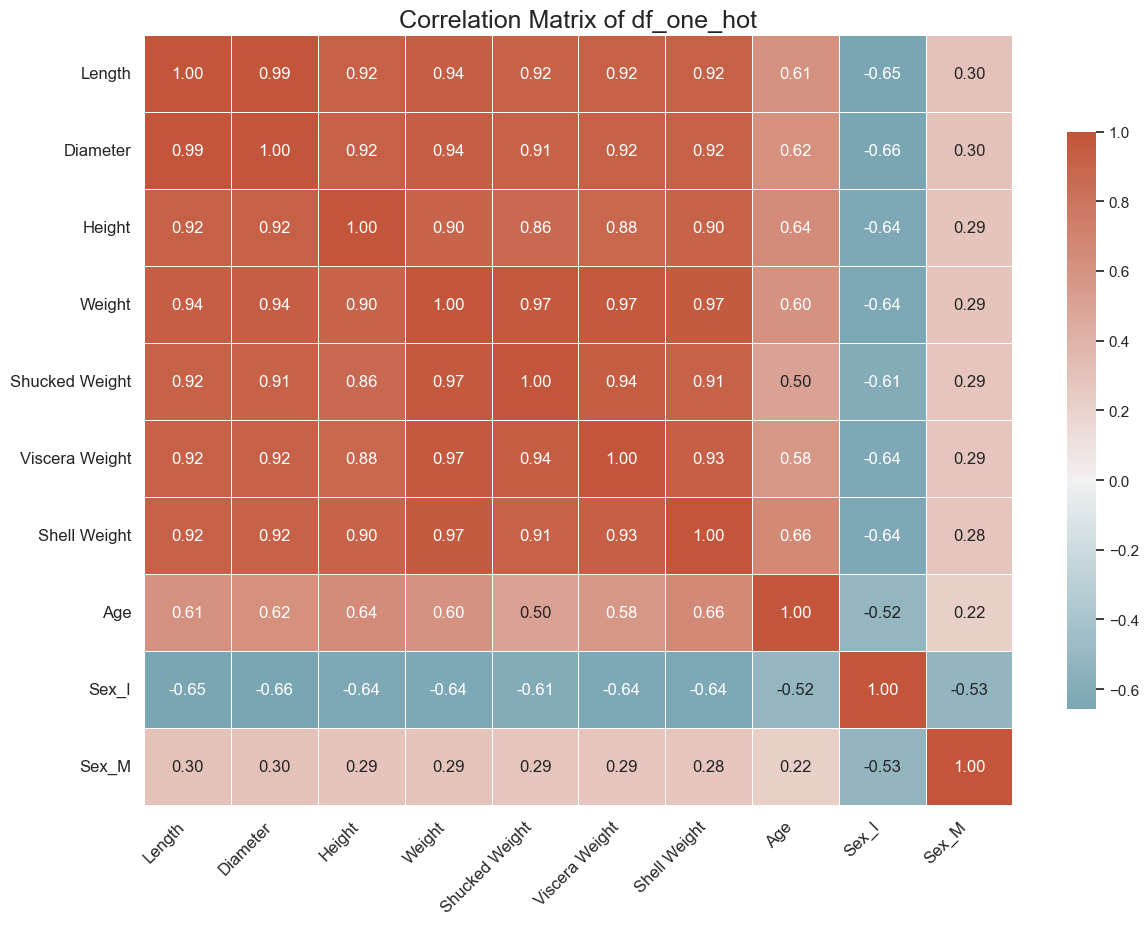

In [45]:
correlation_matrix = df_one_hot.corr()

plt.figure(figsize=(14, 10))

# Use a diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap with better formatting
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title('Correlation Matrix of df_one_hot', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [46]:
df_vif = df_one_hot.drop(columns=['Age'])

df_vif_with_const = sm.add_constant(df_vif)

vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif_with_const.columns

vif_data["VIF"] = [variance_inflation_factor(df_vif_with_const.values, i)
                          for i in range(df_vif_with_const.shape[1])]

vif_data = vif_data[vif_data["Variable"] != "const"]

print(vif_data)

         Variable        VIF
1          Length  50.029756
2        Diameter  52.539130
3          Height   7.731224
4          Weight  76.731546
5  Shucked Weight  22.695250
6  Viscera Weight  17.972270
7    Shell Weight  20.256450
8           Sex_I   2.274033
9           Sex_M   1.392001


## Selection of variables and Multiple Linear Regression

In [47]:
new_df = df_one_hot[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 
                     'Viscera Weight', 'Shell Weight', 'Sex_I', 'Sex_M']]
new_df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1.0,0.0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1.0,0.0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0.0,1.0
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,0.0,0.0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1.0,0.0


In [48]:
df_vif = new_df

df_vif_with_const = sm.add_constant(df_vif)

vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif_with_const.columns

vif_data["VIF"] = [variance_inflation_factor(df_vif_with_const.values, i)
                          for i in range(df_vif_with_const.shape[1])]

vif_data = vif_data[vif_data["Variable"] != "const"]

print(vif_data)

         Variable        VIF
1          Length  50.029756
2        Diameter  52.539130
3          Height   7.731224
4          Weight  76.731546
5  Shucked Weight  22.695250
6  Viscera Weight  17.972270
7    Shell Weight  20.256450
8           Sex_I   2.274033
9           Sex_M   1.392001


In [49]:
X = new_df 
y = df_one_hot["Age"] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                 1.009e+04
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:44:43   Log-Likelihood:            -1.6100e+05
No. Observations:               74051   AIC:                         3.220e+05
Df Residuals:                   74041   BIC:                         3.221e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7558      0.076     49.

## Variable Transformation and Potentially Better Model

In [50]:
y = np.log(df_one_hot["Age"])  

X = sm.add_constant(X)

model_log_age = sm.OLS(y, X).fit()

print(model_log_age.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:44:43   Log-Likelihood:                 18507.
No. Observations:               74051   AIC:                        -3.699e+04
Df Residuals:                   74041   BIC:                        -3.690e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3047      0.007    194.

### Assumption Diagnostics
for the Crab Age Prediction Model. It includes various statistical tests and 
visualizations to ensure that the assumptions underlying the model are valid. 
These diagnostics help in identifying potential issues such as non-linearity, 
heteroscedasticity, multicollinearity, and normality of residuals, which can  affect the model's performance and reliability.

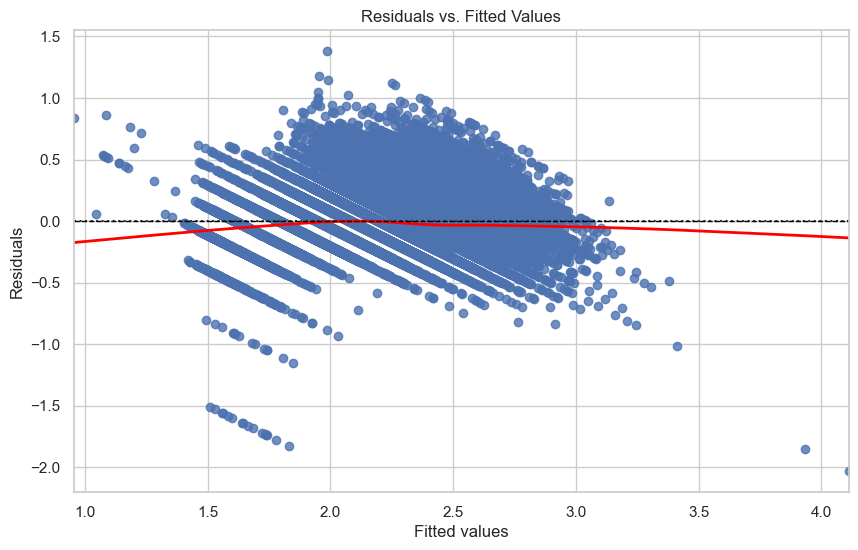

<Figure size 1000x600 with 0 Axes>

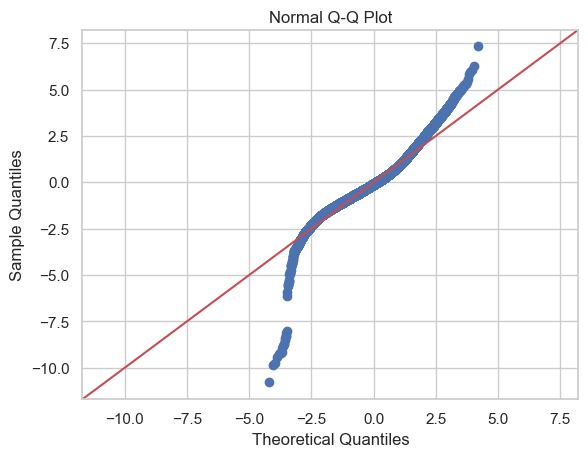

In [51]:
residuals = model_log_age.resid

fitted_values = model_log_age.fittedvalues

plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

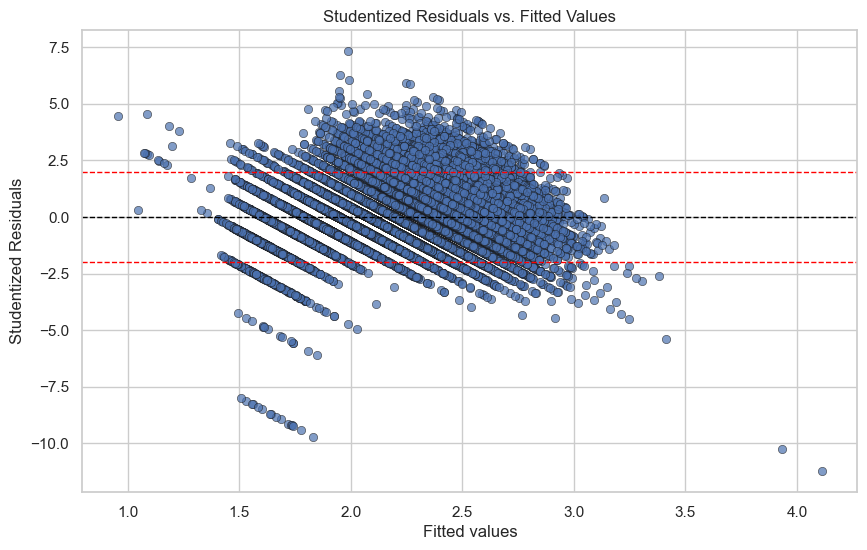

In [52]:
fitted_values_log_age = model_log_age.fittedvalues
studentized_residuals = model_log_age.get_influence().resid_studentized_internal

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values_log_age, y=studentized_residuals, edgecolor='k', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(2, color='red', linestyle='--', linewidth=1)
plt.axhline(-2, color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()

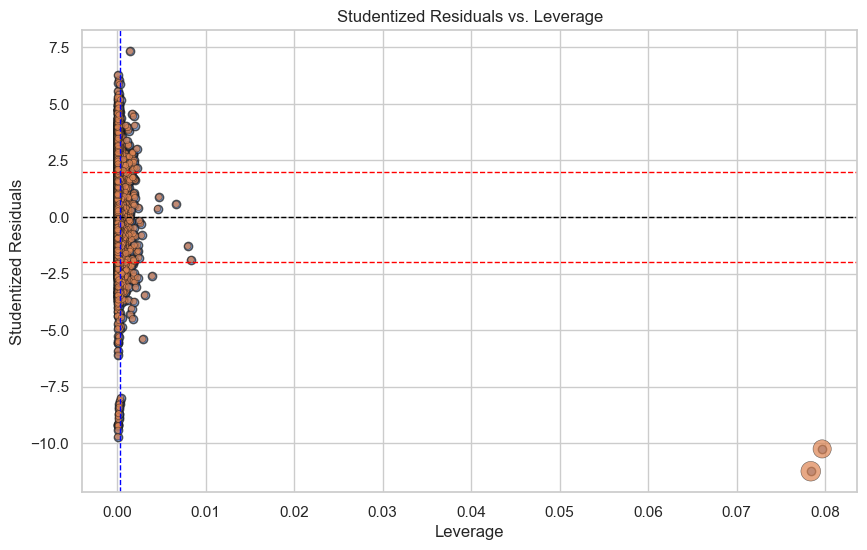

In [53]:
influence = model_log_age.get_influence()

studentized_residuals = influence.resid_studentized_internal

leverage = influence.hat_matrix_diag

cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(10, 6))
plt.scatter(leverage, studentized_residuals, edgecolor='k', alpha=0.7)
sns.scatterplot(x=leverage, y=studentized_residuals, size=cooks_d, sizes=(20, 200), legend=False, edgecolor='k', alpha=0.7)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(2, color='red', linestyle='--', linewidth=1)
plt.axhline(-2, color='red', linestyle='--', linewidth=1)
plt.axvline(2 * (X.shape[1] / X.shape[0]), color='blue', linestyle='--', linewidth=1)

plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Leverage')
plt.show()

## Removing Outliers with High Leverage

In this section, we focus on identifying and removing outliers with high leverage from our dataset. High leverage points can disproportionately influence the results of our regression analysis, leading to biased estimates and reduced model accuracy. By filtering out these outliers, we aim to improve the robustness and reliability of our predictive model.

In [54]:
influence = model.get_influence()

studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag

# Update p and n with the correct values for the expanded feature set
p = X.shape[1]  
n = X.shape[0]
leverage_threshold = 2 * (p / n)

# Apply the mask with updated variables
mask = (np.abs(studentized_residuals) <= 2) & (leverage <= leverage_threshold)

# Select the relevant columns, including all specified variables
filtered_df = df_one_hot.loc[mask, ["Length", "Diameter", "Height", "Weight", 
                                    "Shucked Weight", "Viscera Weight", 
                                    "Shell Weight", "Sex_I", "Sex_M", "Age"]]

# Take the log of Age for the filtered data
filtered_df["log(Age)"] = np.log(filtered_df["Age"])
filtered_df = filtered_df.drop(columns="Age")

filtered_df.head()


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M,log(Age)
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1.0,0.0,2.197225
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1.0,0.0,2.079442
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0.0,1.0,2.197225
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,0.0,0.0,2.397895
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1.0,0.0,2.079442


## Model without Critical Instances

In this section, we refine our model by removing critical instances that may disproportionately influence the results. This step aims to enhance the robustness and reliability of our predictive model.

In [55]:
# Define X_filtered with all selected variables for the model
X_filtered = filtered_df[["Length", "Diameter", "Height", "Weight", 
                          "Shucked Weight", "Viscera Weight", 
                          "Shell Weight", "Sex_I", "Sex_M"]]

y_filtered = filtered_df["log(Age)"]

# Add a constant (intercept) to the filtered features
X_filtered = sm.add_constant(X_filtered)

# Fit the model using the filtered data
model_filtered = sm.OLS(y_filtered, X_filtered).fit()

print(model_filtered.summary())


                            OLS Regression Results                            
Dep. Variable:               log(Age)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 1.612e+04
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:46:45   Log-Likelihood:                 30844.
No. Observations:               65906   AIC:                        -6.167e+04
Df Residuals:                   65896   BIC:                        -6.158e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3075      0.006    203.

### Assumption Diagnostics

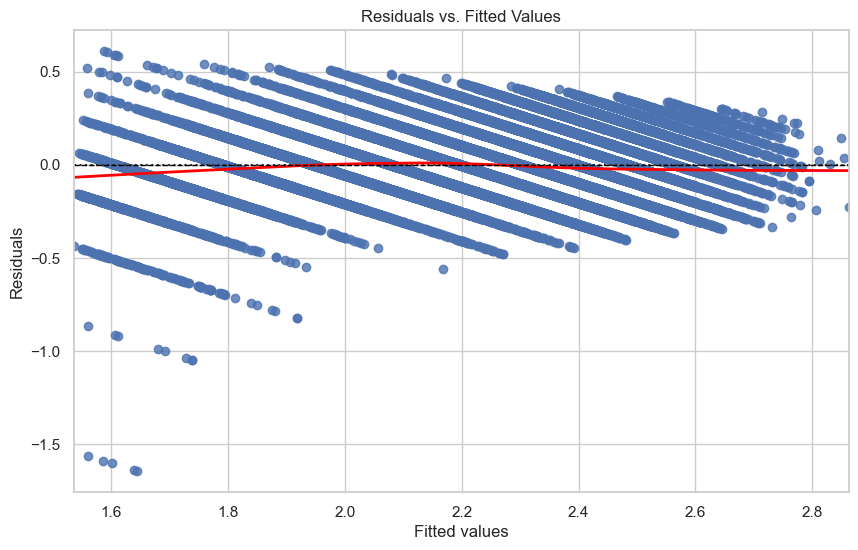

<Figure size 1000x600 with 0 Axes>

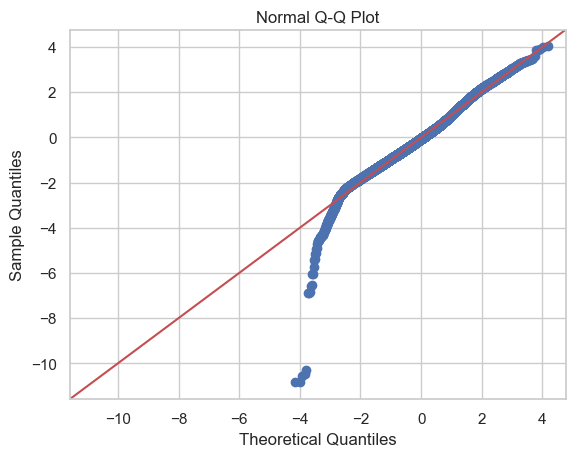

In [56]:
residuals = model_filtered.resid

fitted_values = model_filtered.fittedvalues

plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

## Model Testing

This section involves testing our model with a new dataset. The dataset contains the following columns: `id`, `Sex`, `Length`, `Diameter`, `Height`, `Weight`, `Shucked Weight`, `Viscera Weight`, and `Shell Weight`. Our goal is to predict the age of the crabs in this dataset.

### Recap
- Our training model was trained on a dataset with 74,051 entries.
- We will now use the model to predict the age of 49,368 crabs in the testing dataset.


In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

test_df = pd.read_csv('/Users/mark/Documents/crab_age_prediction/Crab Age Prediction Model/test_dataset.csv')
test_df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...,...
49363,123414,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
49364,123415,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
49365,123416,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345
49366,123417,F,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163


In [58]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  

encoded_sex = encoder.fit_transform(test_df[['Sex']])

encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['Sex']))

test_df = test_df.drop('Sex', axis=1)
test_df = pd.concat([test_df, encoded_sex_df], axis=1)
test_df

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,1.0,0.0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,1.0,0.0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,0.0,0.0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,0.0,0.0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
49363,123414,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,0.0,0.0
49364,123415,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,1.0,0.0
49365,123416,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,0.0,0.0
49366,123417,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,0.0,0.0


## Displaying the Predicted Model

In this section, we display the predicted ages for the test dataset using our trained model. You can see here that we have successfully predicted the ages of the crabs in the test dataset.


Here is the predicted age data:

In [59]:
# Define the test features
features = test_df[["Length", "Diameter", "Height", "Weight", 
                  "Shucked Weight", "Viscera Weight", 
                  "Shell Weight", "Sex_I", "Sex_M"]]

# Add intercept for the test data
features = sm.add_constant(features)

# Predict the log of Age and convert it back
predicted_log_age = model_filtered.predict(features)
predicted_age = np.exp(predicted_log_age)

# Create a DataFrame with the predicted ages
predicted_age_df = test_df.copy()
predicted_age_df["Age"] = predicted_age

predicted_age_df


,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M,Age
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,1.0,0.0,7.424755
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,1.0,0.0,7.460912
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,0.0,0.0,10.086296
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,0.0,0.0,9.258544
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,1.0,0.0,7.361447
...,...,...,...,...,...,...,...,...,...,...,...
49363,123414,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,0.0,0.0,9.356249
49364,123415,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,1.0,0.0,7.356469
49365,123416,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,0.0,0.0,11.554156
49366,123417,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,0.0,0.0,9.428025
